In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# données
G=6.67408*10**(-11)
rmin=362600000          # m
e=0.0549006
mT=5.972*10**(24)       # kg
mL=7.348*10**(22)       # kg
Vpér=1083.4             # m/s

# conditions initiales
vx0=0
vy0=Vpér
x0=-rmin
y0=0

# méthode numérique
dt=1                    # seconde

In [3]:
def f(u):
    
    vx = u[0]
    vy = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-G*mT*x/((x**2+y**2)**(3/2)),
                      -G*mT*y/((x**2+y**2)**(3/2)),
                      vx,
                      vy])

In [4]:
def rk4_step(u, f, dt):
    
    k1=f(u)
    k2=f(u+0.5*dt*k1)
    k3=f(u+0.5*dt*k2)
    k4=f(u+dt*k3)

    return u + (dt/6)*(k1+2*k2+2*k3+k4)     # correspond à un pas dt dans le temps

In [5]:
T  = 2160000                        # 25 jours
dt = 1
N  = int(T/dt) + 1

# on prépare le tableau de solutions
u_rk4 = numpy.empty((N, 4))

# initialisation
u_rk4[0] = numpy.array([vx0,vy0,x0,y0])

for n in range(N-1):
    
    u_rk4[n+1] = rk4_step(u_rk4[n], f, dt)

In [6]:
vx_rk4 = u_rk4[:,0]
vy_rk4 = u_rk4[:,1]
x_rk4 = u_rk4[:,2]
y_rk4 = u_rk4[:,3]

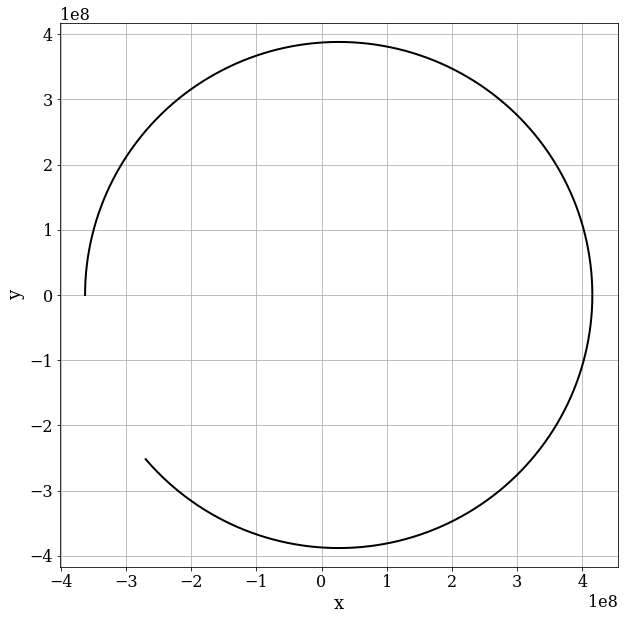

In [7]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.axis('equal')
pyplot.plot(x_rk4,y_rk4, 'k-', lw=2);

Axes?

In [8]:
idx_vx_positif = numpy.where(vx_rk4>0)[0]
print(idx_vx_positif)

[      1       2       3 ..., 1207199 1207200 1207201]


In [9]:
idx_vy_positif = numpy.where(vy_rk4>0)[0]
idx_y_positif = numpy.where(y_rk4>0)[0]
haut_extreme = numpy.intersect1d(idx_vy_positif,idx_y_positif)

print(haut_extreme)

[     1      2      3 ..., 577541 577542 577543]


In [10]:
idx_vy_negatif = numpy.where(vy_rk4<0)[0]
idx_y_negatif = numpy.where(y_rk4<0)[0]
bas_extreme = numpy.intersect1d(idx_vy_negatif,idx_y_negatif)

print(bas_extreme)

[1207202 1207203 1207204 ..., 1836857 1836858 1836859]


In [11]:
A=idx_vx_positif[-1]
print(A)

1207201


In [12]:
B1=haut_extreme[-1]
print(B1)

577543


In [13]:
B2=bas_extreme[-1]
print(B2)

1836859


In [14]:
DEMI_AXE=(x_rk4[A]-x_rk4[0])/2
demi_axe=(y_rk4[B1]-y_rk4[B2])/2
print(DEMI_AXE)
print(demi_axe)

388976774.675
388081430.88


Excentricité:

In [15]:
enum=(1-(demi_axe/DEMI_AXE)**2)**(1/2)
print(enum)

0.0678106673586


Période de l'orbite?

(On recalcule la trajectoire en faisant en sorte que le quart de cercle soit couvert)

In [16]:
T  = 3000000                    
dt = 1
N  = int(T/dt) + 1                 

u_rk4 = numpy.empty((N, 4))

# initialisation
u_rk4[0] = numpy.array([vx0,vy0,x0,y0])

for n in range(N-1):
    
    u_rk4[n+1] = rk4_step(u_rk4[n], f, dt)

In [17]:
idx_quart_4 = numpy.intersect1d(idx_vy_positif,idx_y_negatif)
print(idx_quart_4)

[1836860 1836861 1836862 ..., 2159998 2159999 2160000]


In [18]:
dernier_indice=idx_quart_4[-1]
periode_secondes=dernier_indice
print(periode_secondes)
periode_jours=periode_secondes/84600
print(periode_jours)

2160000
25.5319148936


Ordre de RK4:

In [28]:
def get_diffgrid(u_current, u_fine, dT):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dT * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [32]:
r = 2
h = 1

dt_values = numpy.array([h, r*h, r**2*h])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

diffgrid = numpy.empty(2) 

for i, dT in enumerate(dt_values):
    
    N = int(periode_secondes/dT) + 1   # number of time-steps

    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([vx0,vy0,x0,y0])

    # time loop
    for n in range(N-1):

        u[n+1] = rk4_step(u[n], f, dt)
    
    u_values[i] = u
    

#calculate f2 - f1
diffgrid[0] = get_diffgrid(u_values[1], u_values[0], dt_values[1])

#calculate f3 - f2
diffgrid[1] = get_diffgrid(u_values[2], u_values[1], dt_values[2])

# calculate the order of convergence
p = (log(diffgrid[1])-log(diffgrid[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

The order of convergence is p = -0.206
